#TP1 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images

**But du TP** :
* comprendre la structure d'un fichier son et d'une image
* comprendre comment afficher un fichier son ou image
* être capable de comprendre le changement de quantification et d'échantillonnage d'un fichier et être capable de générer ces changements sur un fichier.

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

In [41]:
# OS setup
#!cat /etc/os-release
!apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

fatal: destination path 'tp-m1-ts' already exists and is not an empty directory.


In [42]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from IPython.display import Audio

In [ ]:
!tree tp-m1-ts/tp1/

tp-m1-ts/tp1/
├── diner.wav
├── photo.jpg
└── resultat_attendu
    ├── diner_16khz_12bits.wav
    ├── diner_16khz_2bits.wav
    ├── diner_16khz_4bits.wav
    ├── diner_16khz_8bits.wav
    ├── diner_2khz_16bits.wav
    ├── diner_4khz_16bits.wav
    └── diner_8khz_16bits.wav

1 directory, 9 files


##Manipulation de fichiers numériques

###Signal audio

Vous pouvez essayer de charger le fichier audio avec [wav.read](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html) à partir de la bibliothèque [scipy.io.wavfile](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io.wavfile) :

In [ ]:
import scipy.io.wavfile as wav
fs, signal = wav.read('tp-m1-ts/tp1/diner.wav')

Ecouter le signal :

In [ ]:
Audio(data=signal, rate=fs)

* Affichez les valeurs suivantes : la fréquence d'échantillonnage, la quantification de ce fichier, le nombre d'échantillons

In [ ]:
print("Fe: ", fs)
print("Quantification: ", signal.dtype)
print("Nombre d'échantillonage: ", len(signal))

Fe:  16000
Quantification:  int16
Nombre d'échantillonage:  175125


* Afficher graphiquement le signal, avec l'axe des x en secondes

175125


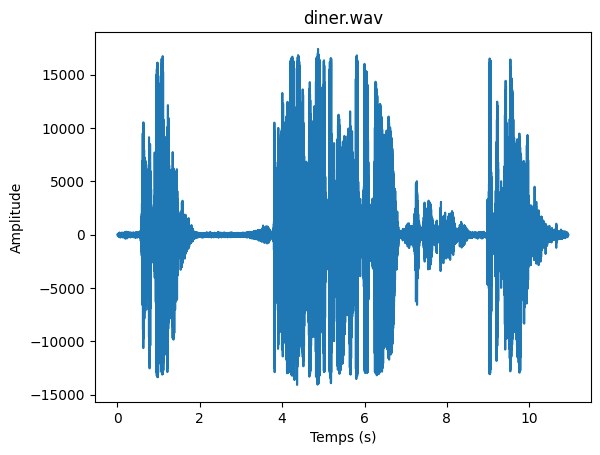

In [ ]:
duree = np.arange(0, len(signal)) / fs

print(len(duree))

plt.plot(duree, signal)

plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('diner.wav')

plt.show()

* Transformer des données du signal (qui est en entiers de $-2^{15}+1$ à $2^{15}$) en réels entre -1 et 1. C'est juste une nouvelle version des données, qui vous permettra de moins déborder au niveau des calculs lors de vos manipulations.

In [ ]:
normalized_signal = signal / np.iinfo(signal.dtype).max
np.iinfo(signal.dtype).max

32767

* Affichez a nouveau graphiquement ce signal en réels avec l'axe des abscisses en secondes. Ca ne devrait pas différer au niveau de la forme du signal en dehors de la plage de valeurs en ordonnée.


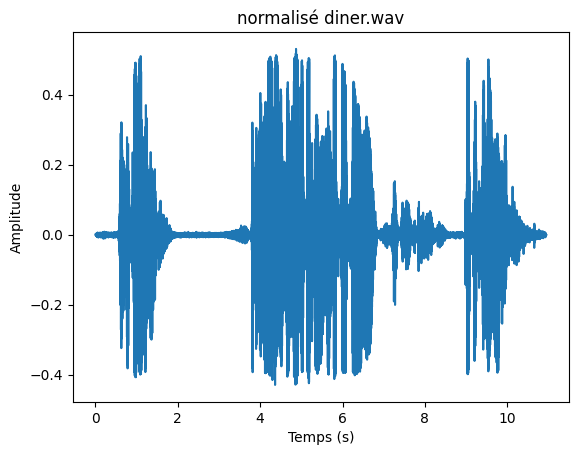

In [ ]:
plt.plot(duree, normalized_signal)

plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('normalisé diner.wav')

plt.show()

* Affichez les valeurs des 50 premières valeurs à partir de l'index 2000. Affichez aussi graphiquement ces valeurs, avec les points représentés par des "*" rouges, et les traits entre les points en bleu.


point entre 2000 et 2050:  [ 6.10370190e-05 -2.13629566e-04 -7.32444227e-04 -3.96740623e-04
 -9.15555284e-05 -6.40888699e-04 -1.43436995e-03 -1.86162908e-03
 -1.40385144e-03  4.27259133e-04  2.04474013e-03  1.34281442e-03
 -1.03762932e-03 -2.68562883e-03 -2.86873989e-03 -2.07525864e-03
 -7.01925718e-04 -1.52592547e-04 -1.92266610e-03 -4.39466536e-03
 -4.30310984e-03 -2.04474013e-03 -1.03762932e-03 -1.58696249e-03
 -1.52592547e-03 -4.57777642e-04 -3.66222114e-04 -1.40385144e-03
 -1.98370312e-03 -1.86162908e-03 -2.22785119e-03 -2.62459181e-03
 -2.04474013e-03 -1.12918485e-03 -5.79851680e-04 -9.15555284e-05
  1.83111057e-04 -8.85036775e-04 -2.28888821e-03 -1.92266610e-03
 -4.57777642e-04  3.05185095e-05 -1.52592547e-04  3.66222114e-04
  1.00711081e-03  8.54518265e-04  8.54518265e-04  1.34281442e-03
  1.34281442e-03  8.85036775e-04]


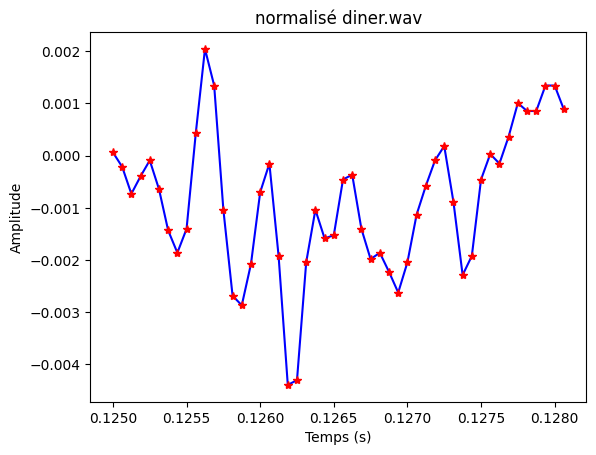

In [ ]:
start = 2000
stop = start + 50

section = normalized_signal[start:stop]
print(f"point entre {start} et {stop}: ", section)

duree_section = np.arange(start, stop) / fs

plt.plot(duree_section, normalized_signal[start:stop], 'b')
# Tracer graphiquement les valeurs
plt.plot(duree_section, section, '*', color='r')


plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('normalisé diner.wav')

plt.show()

Vous allez écouter le fichier en version ralentie et accélérée.



In [ ]:
Audio(data=signal, rate=fs/2)

In [ ]:
Audio(data=signal, rate=fs*2)

Qu'advient-il des fréquences ? Cette transformation est-elle normale ? Ainsi, si l'on veut jouer plus rapidement un fichier son, quel type de transformation sera nécessaire pour avoir des fréquences normales ? Est-ce que c'est ce que fait youtube avec le changement de débit à la lecture des vidéos ?

Quand on augmente la Fe, la frèquence diminue et si on diminue la Fe, frequence augmente. Donc quand le signal est ralenti le son est plus aigue. On peut faire une interpolation pour jouer plus rapidement une fichier sans changer sa frèquence.

### Image

In [43]:
img = plt.imread('tp-m1-ts/tp1/photo.jpg')

* Indiquer les caractéristiques de l'image : taille, type d'éléments


In [ ]:
print(img.shape)

(595, 900, 3)


* Affichez graphiquement cette image


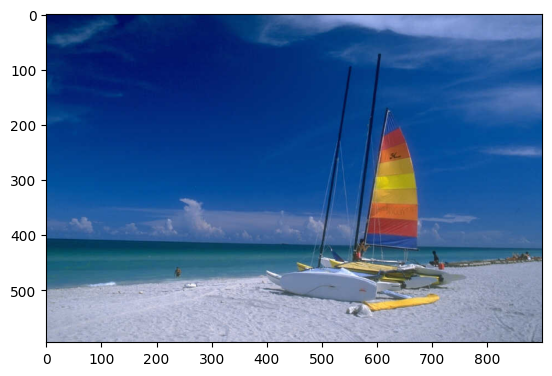

In [ ]:
plt.imshow(img)
plt.show()

* Afficher les intensités RVB du premier pixel de l'image

Intensités du premier pixel: [ 2 16 91]


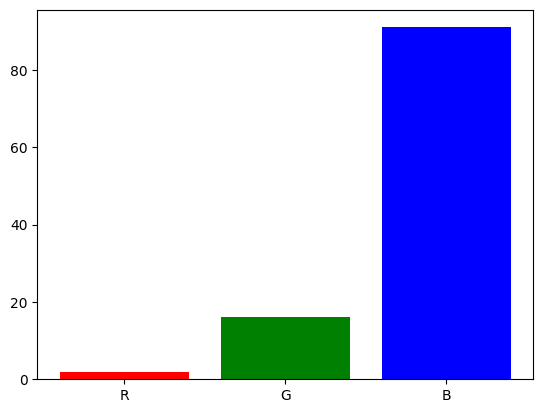

In [ ]:
pixel1 = img[0, 0, :]

print("Intensités du premier pixel:", pixel1)

plt.bar(['R', 'G', 'B'], pixel1, color=['r', 'g', 'b'])
plt.show()

##Quantification, échantillonnage

* Écrire une fonction pour sous-quantifier un fichier audio. Testez-la avec une quantification de 12 bits, 8 bits, 4 bits et 2 bits. Affichez à chaque fois un graphique avec chaque transformation. Que pensez-vous de la qualité sonore obtenue ?

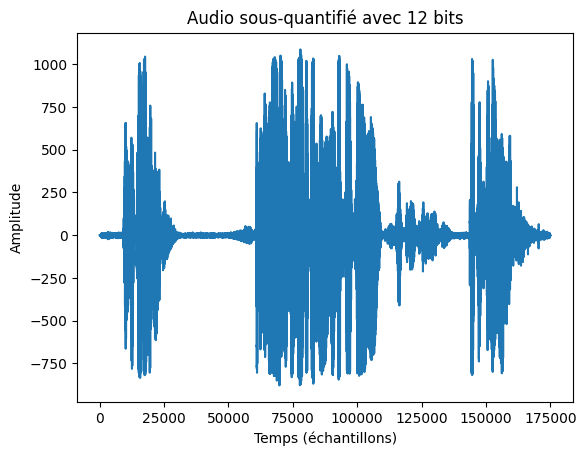

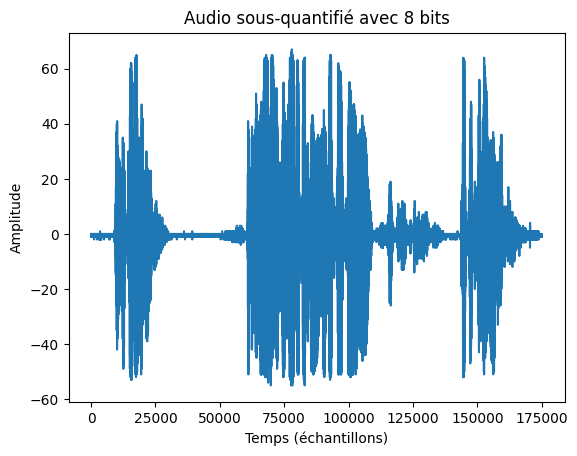

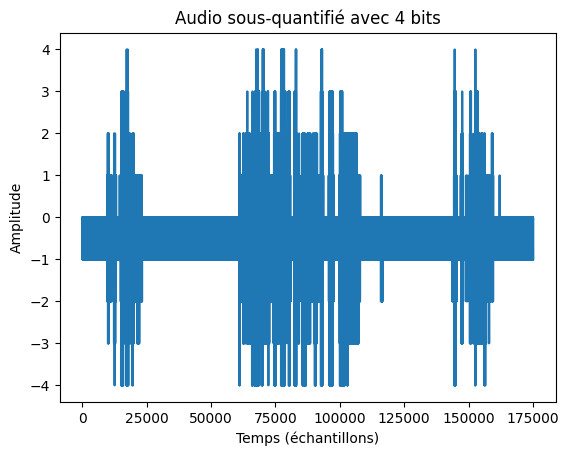

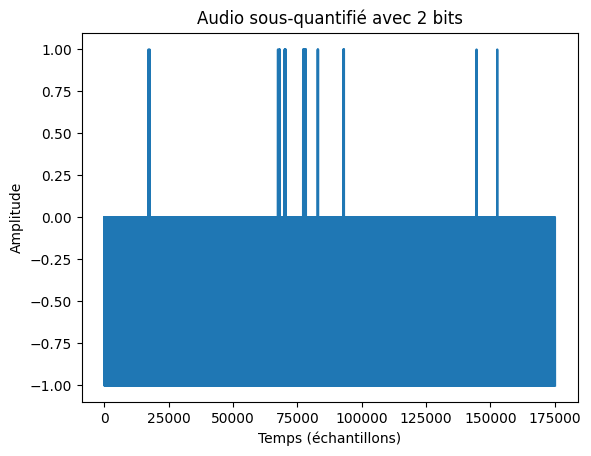

In [ ]:
def sub_quantize_audio(signal, n_bits):
    quantized_signal = signal// 2**(16-n_bits)

    return quantized_signal.astype(np.int16)


quantization_bits = [12, 8, 4, 2]
for n_bits in quantization_bits:
    quantized_signal = sub_quantize_audio(signal, n_bits)
    wav.write(f'diner_quantized_{n_bits}bits.wav', fs, quantized_signal)

    plt.plot(quantized_signal)
    plt.title(f'Audio sous-quantifié avec {n_bits} bits')
    plt.xlabel('Temps (échantillons)')
    plt.ylabel('Amplitude')
    plt.show()


* Écrire une fonction pour sauvegarder une variable audio dans un fichier. Vous pouvez utiliser [wav.write](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html). Vérifiez que l'échantillonnage et la quantification sont corrects dans les fichiers résultants.


In [ ]:
def check_sampling_quantization(file_path):
    fs, signal = wav.read(file_path)

    print(f"Fichier: {file_path}")
    print(f"Fréquence d'échantillonnage (fs): {fs} Hz")
    print(f"Nombre total d'échantillons: {len(signal)}")
    print(f"Valeur minimale de l'échantillon: {np.min(signal)}")
    print(f"Valeur maximale de l'échantillon: {np.max(signal)}")
    print(f"Nombre de bits utilisés: {signal.dtype.itemsize * 8} bits\n")

quantization_bits = [12, 8, 4, 2]
for n_bits in quantization_bits:
    file_path = f'diner_quantized_{n_bits}bits.wav'
    check_sampling_quantization(file_path)

Fichier: diner_quantized_12bits.wav
Fréquence d'échantillonnage (fs): 16000 Hz
Nombre total d'échantillons: 175125
Valeur minimale de l'échantillon: -1656
Valeur maximale de l'échantillon: 2047
Nombre de bits utilisés: 16 bits

Fichier: diner_quantized_8bits.wav
Fréquence d'échantillonnage (fs): 16000 Hz
Nombre total d'échantillons: 175125
Valeur minimale de l'échantillon: -103
Valeur maximale de l'échantillon: 127
Nombre de bits utilisés: 16 bits

Fichier: diner_quantized_4bits.wav
Fréquence d'échantillonnage (fs): 16000 Hz
Nombre total d'échantillons: 175125
Valeur minimale de l'échantillon: -6
Valeur maximale de l'échantillon: 7
Nombre de bits utilisés: 16 bits

Fichier: diner_quantized_2bits.wav
Fréquence d'échantillonnage (fs): 16000 Hz
Nombre total d'échantillons: 175125
Valeur minimale de l'échantillon: -1
Valeur maximale de l'échantillon: 1
Nombre de bits utilisés: 16 bits



In [ ]:
fs, signalq = wav.read('diner_quantized_12bits.wav')
Audio(data=signalq, rate=fs)

In [ ]:
fs, signalc = wav.read('tp-m1-ts/tp1/resultat_attendu/diner_16khz_4bits.wav')
Audio(data=signalc, rate=fs)

* Écrire une fonction pour sous-échantillonner un fichier audio (encodé en nombres entiers ou flottants). Testez-la avec un sous-échantillonnage x2, x4 et x8. Que remarquez-vous ?

In [ ]:
def downsample_audio(signal, factor):
    downsampled_signal = signal[::factor]
    return downsampled_signal

fs, signal = wav.read('tp-m1-ts/tp1/diner.wav')


downsampling_factors = [2, 4, 8]
for factor in downsampling_factors:
    downsampled_signal = downsample_audio(signal, factor)
    wav.write(f'diner_downsampled_x{factor}.wav', fs // factor, downsampled_signal)

    # Affichage du signal sous-échantillonné
    print(f"Facteur de sous-échantillonnage: {factor}")
    print(f"Nouvelle fréquence d'échantillonnage: {fs // factor} Hz")
    print(f"Nombre total d'échantillons après sous-échantillonnage: {len(downsampled_signal)}\n")

Facteur de sous-échantillonnage: 2
Nouvelle fréquence d'échantillonnage: 8000 Hz
Nombre total d'échantillons après sous-échantillonnage: 87563

Facteur de sous-échantillonnage: 4
Nouvelle fréquence d'échantillonnage: 4000 Hz
Nombre total d'échantillons après sous-échantillonnage: 43782

Facteur de sous-échantillonnage: 8
Nouvelle fréquence d'échantillonnage: 2000 Hz
Nombre total d'échantillons après sous-échantillonnage: 21891



In [ ]:
fss, signalsse = wav.read('diner_downsampled_x4.wav')
Audio(data=signalsse, rate=fss)

* Ecrivez une fonction pour sous-quantifier une image en conservant les n bits les plus significatifs (les autres sont mis à 0). Testez-la avec 2 bits et 3 bits. Que remarquez-vous ?
Note : Vous pouvez utiliser [numpy.bitwise_and](https://numpy.org/doc/stable/reference/generated/numpy.bitwise_and.html) pour accéder à la valeur d'un bit.

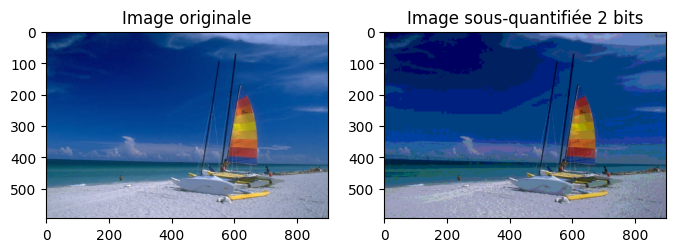

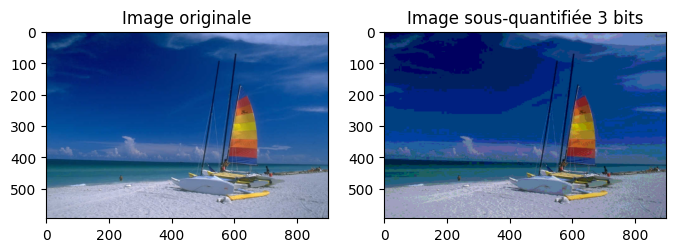

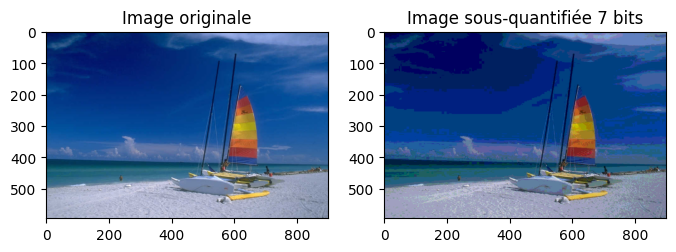

In [48]:
"""
def sub_quantize_image(image, n_bits):
    quantized_image = np.bitwise_and(image, 2**n_bits - 1)

    quantized_image = (quantized_image / (2**n_bits - 1) * 255).astype(np.uint8)

    return quantized_image
"""
def sub_quantize_image(image, n_bits):
    step = 256 / 2**n_bits

    # Quantize the image by rounding to the nearest multiple of the step
    quantized_image = np.round(image / step) * step

    # Clip the image to the valid range of uint8
    quantized_image = np.clip(quantized_image, 0, 255)

    # Cast the result to uint8
    quantized_image = quantized_image.astype(np.uint8)

    return quantized_image

def mask_n_most_significant(n):
  return (0x1<<n)-1 << (8-n)

# np.bitwise_and(img, mask_n_most_significant(3))

img = plt.imread('tp-m1-ts/tp1/photo.jpg')

quantization_bits = [2, 3, 7]
for n_bits in quantization_bits:
    quantized_img = sub_quantize_image(img, n_bits)
    #quantized_img = np.bitwise_and(img, mask_n_most_significant(3))

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Image originale')

    plt.subplot(1, 2, 2)
    plt.imshow(quantized_img)
    plt.title(f'Image sous-quantifiée {n_bits} bits')

    plt.show()